# Visualize Laserdata

In [1]:
import laspy
import pyvista as pv
import numpy as np

In [2]:
# Load LAS files
file_id = 2
filenames = ["692_5335.laz", # Lehel
             "691_5334.laz", # Old town
             "690_5335.laz"  # Train station
             ]

las = laspy.read("../data/" + filenames[file_id])


# Find out what the point format looks like.
for dimension in las.point_format.dimensions:
    print(dimension.name)

X
Y
Z
intensity
return_number
number_of_returns
scan_direction_flag
edge_of_flight_line
classification
synthetic
key_point
withheld
scan_angle_rank
user_data
point_source_id
gps_time


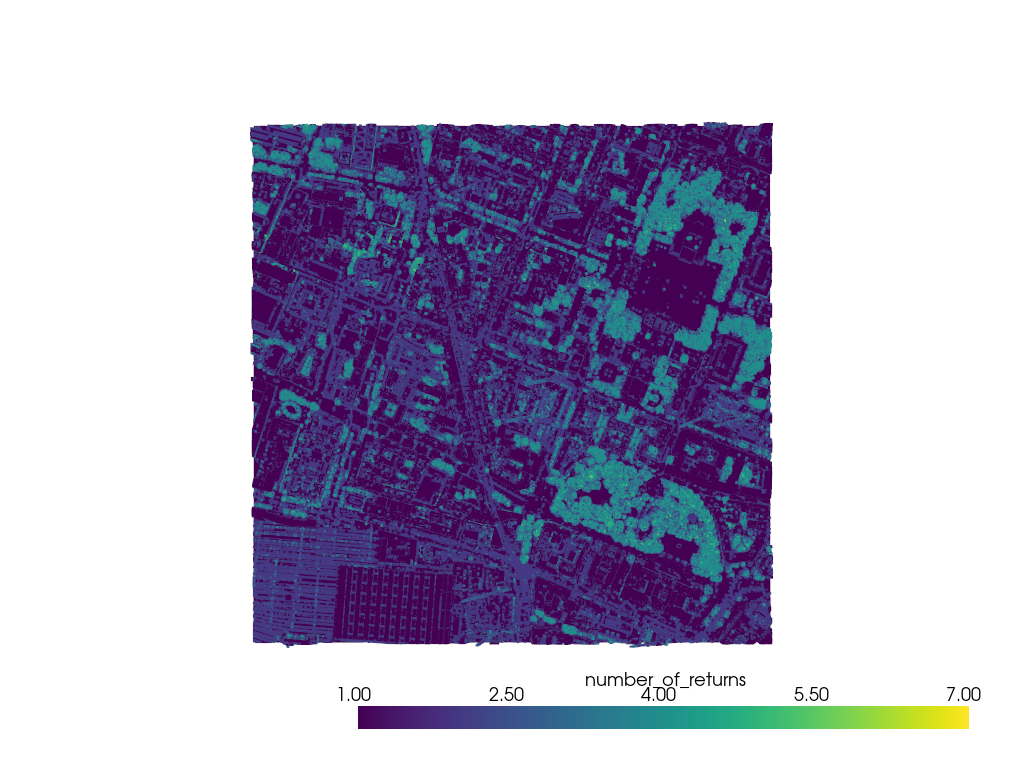

In [5]:
# Create a PyVista point cloud
cloud = pv.PolyData(np.column_stack((las.x, las.y, las.z)))
cloud['number_of_returns'] = las.number_of_returns

# Plotting with PyVista, potentially using GPU rendering
pl = pv.Plotter()
pl.add_points(cloud, scalars='number_of_returns', cmap='viridis', point_size=2.0)
pl.camera_position = 'xy'
pl.screenshot(f'screenshots/{filenames[file_id]}.png')
pl.show(jupyter_backend='static')